<a href="https://www.kaggle.com/code/asselbatu/economics-data-analysis?scriptVersionId=170268951" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install fredapi > /dev/null

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight') 
#to set the style of the plots to the "fivethirtyeight" style

pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'put_your_key_here'
# put the api_key in secrets 


from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("EcoFred")

# 1.  Create The Fred Object

In [3]:
fred = Fred(api_key = fred_key)

# 2.  Search for Economic Data 

In [4]:
sp_search = fred.search('S&P',order_by = 'popularity')

In [5]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-04-04,2024-04-04,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-04-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-04-03 08:55:09-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-04-04,2024-04-04,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-03-26 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-04-04,2024-04-04,S&P 500,2014-04-04,2024-04-03,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-04-03 19:10:56-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-04-04,2024-04-04,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-04-04,2024-04-04,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-04-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-04-03 08:55:12-05:00,82,This data represents the effective yield of th...


# 3. Pull Raw Data and Plot


<Axes: title={'center': 'S&P 500'}>

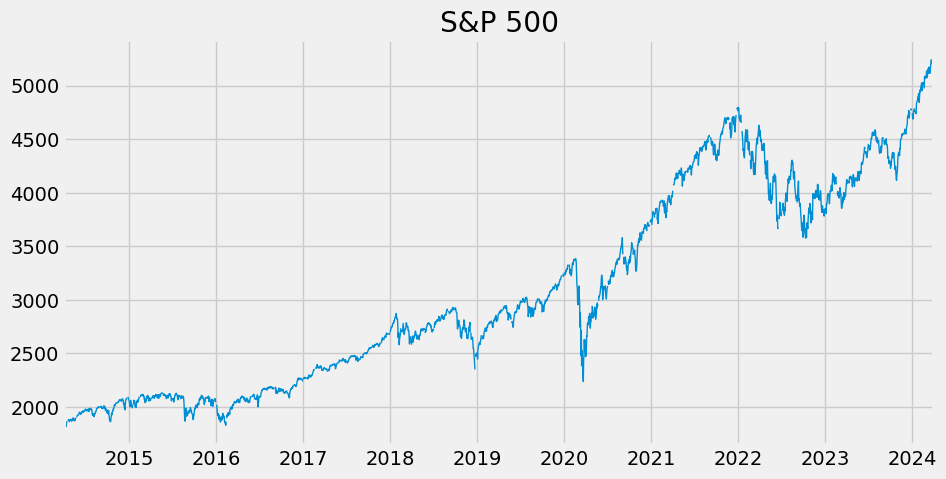

In [6]:
sp500 = fred.get_series(series_id = 'SP500')
sp500.plot(figsize =(10,5),title = 'S&P 500',lw = 1)


# 4. Pull and Join  Multiple Data Series

In [7]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df= unemp_df.loc[~unemp_df['id'].apply(lambda x:(len(x)>4))]



In [8]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
uemp_results = pd.concat(all_results, axis=1)

In [9]:
uemp_states = uemp_results
#uemp_states.columns = uemp_states.columns.str.strip()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','').to_dict()

uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]
uemp_states.columns = uemp_states.columns.str.strip()



In [10]:
uemp_states

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,Illinois,New Jersey,Georgia,Colorado,Arizona,Wisconsin,Virginia,Kentucky,South Carolina,New Mexico,Minnesota,Tennessee,Washington,Maryland,Oregon,West Virginia,Nevada,Arkansas,Oklahoma,Missouri,Alaska,Iowa,Utah,Puerto Rico,Indiana,Louisiana,Hawaii,North Dakota,Montana,the District of Columbia,Mississippi,Maine,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.8,10.2,5.8,6.1,5.6,7.4,8.6,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.8,19.6,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.2,5.8,6.1,5.6,7.4,8.7,6.0,6.0,8.5,6.4,9.5,7.5,9.2,7.3,5.8,5.9,7.1,4.3,5.9,19.5,6.6,6.3,9.8,3.4,5.8,8.7,6.7,8.7,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,6.6,10.3,8.4,5.7,10.1,5.7,6.1,5.6,7.3,8.7,5.9,6.0,8.4,6.4,9.4,7.5,9.2,7.3,5.8,5.9,7.0,4.3,5.8,19.3,6.5,6.3,9.8,3.4,5.8,8.6,6.6,8.6,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,6.6,10.3,8.3,5.6,10.0,5.6,6.0,5.6,7.2,8.6,5.8,6.0,8.5,6.4,9.2,7.5,9.0,7.2,5.8,6.0,6.9,4.2,5.8,19.0,6.3,6.4,9.7,3.5,5.8,8.5,6.4,8.6,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,6.6,10.3,8.1,5.6,9.8,5.5,5.9,5.5,7.0,8.6,5.7,5.9,8.5,6.5,9.1,7.4,8.9,7.1,5.7,6.0,6.9,4.1,5.7,18.9,6.0,6.5,9.4,3.6,5.8,8.4,6.3,8.5,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,5.1,3.9,4.6,3.1,3.4,3.6,4.2,2.8,3.4,3.6,4.8,4.8,3.2,3.3,4.2,3.4,3.0,4.3,3.0,4.0,2.8,3.5,4.4,2.3,4.0,4.3,5.3,3.7,3.5,3.3,4.6,3.1,2.8,5.6,3.5,4.0,3.0,1.9,3.3,4.9,3.2,3.4,2.5,4.2,3.3,2.6,3.4,2.6,2.9,4.1,2.3,2.1
2023-11-01,5.1,3.9,4.6,3.1,3.4,3.6,4.1,2.8,3.3,3.6,4.7,4.8,3.2,3.3,4.2,3.4,3.1,4.3,3.0,4.0,2.7,3.5,4.4,2.2,4.0,4.3,5.3,3.7,3.5,3.3,4.6,3.1,2.8,5.6,3.5,4.0,3.0,1.9,3.3,4.9,3.2,3.4,2.5,4.2,3.3,2.6,3.4,2.6,2.9,4.1,2.3,2.1
2023-12-01,5.1,3.9,4.6,3.1,3.4,3.6,4.1,2.8,3.2,3.6,4.7,4.8,3.2,3.3,4.2,3.4,3.0,4.3,3.0,4.0,2.7,3.4,4.4,2.2,4.0,4.3,5.3,3.7,3.5,3.3,4.6,3.0,2.8,5.7,3.5,4.0,3.0,1.9,3.3,4.9,3.2,3.4,2.5,4.2,3.3,2.6,3.4,2.6,2.9,4.1,2.3,2.1
2024-01-01,5.2,3.9,4.5,3.1,3.4,3.7,4.0,2.9,3.0,3.5,4.7,4.8,3.1,3.4,4.2,3.2,3.0,4.3,3.0,4.0,2.7,3.5,4.6,2.3,4.1,4.3,5.3,3.7,3.5,3.3,4.6,3.0,2.8,5.7,3.5,4.1,3.1,1.9,3.3,5.0,3.2,3.4,2.5,4.4,3.3,2.6,3.6,2.6,2.8,4.1,2.3,2.1


In [11]:
px.line(uemp_states)
#uemp_states.plot()


# Pull April 2020 Unemployment rate Per State

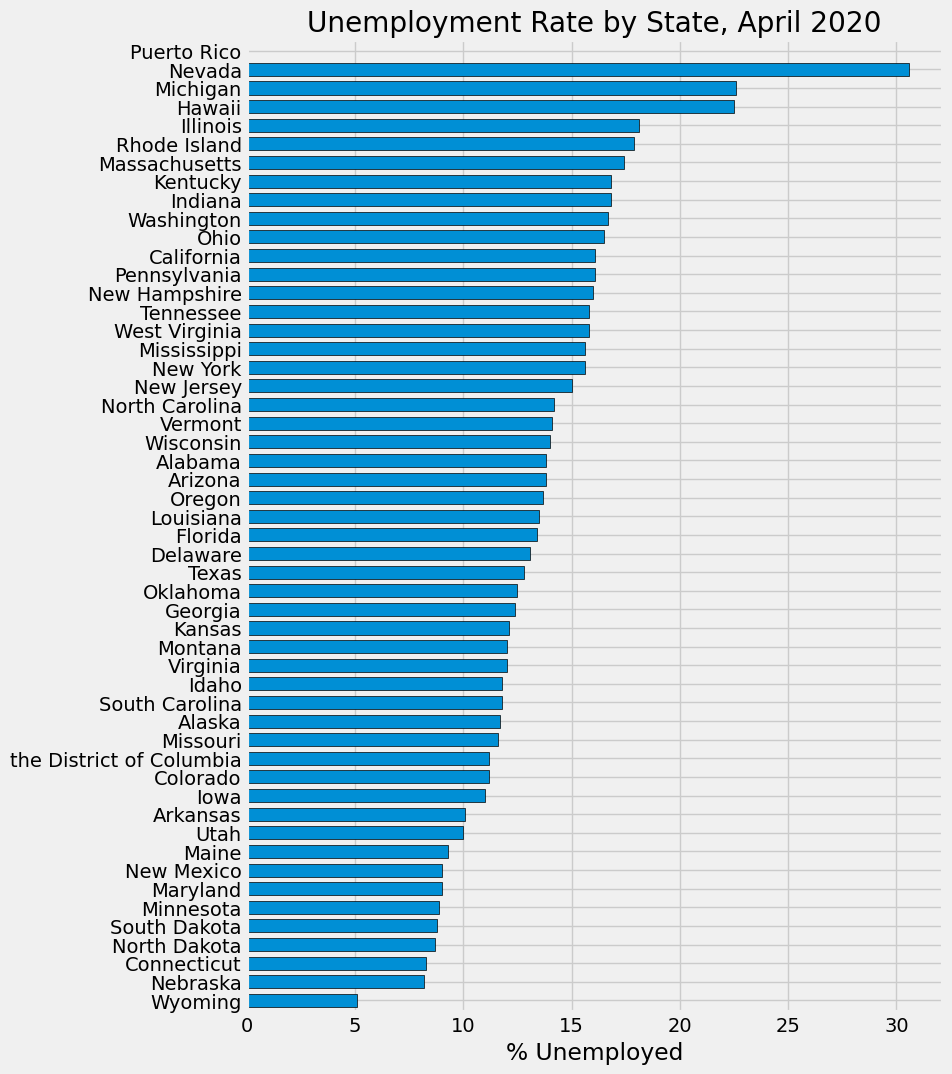

In [12]:
ax = uemp_states.loc[uemp_states.index == '2020-04-01'].T \
.sort_values('2020-04-01') \
.plot(kind = 'barh',figsize=(8,12),width=0.7,edgecolor='black',title='Unemployment Rate by State, April 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

# Pull Participation Rate 


In [13]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

part_df = part_df.loc[part_df['id'].str.startswith('LBS')]


In [14]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]
part_states.columns = part_states.columns.str.strip()

# Plot Unemployment VS  Particiaption

In [15]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia': 'District Of Columbia'})

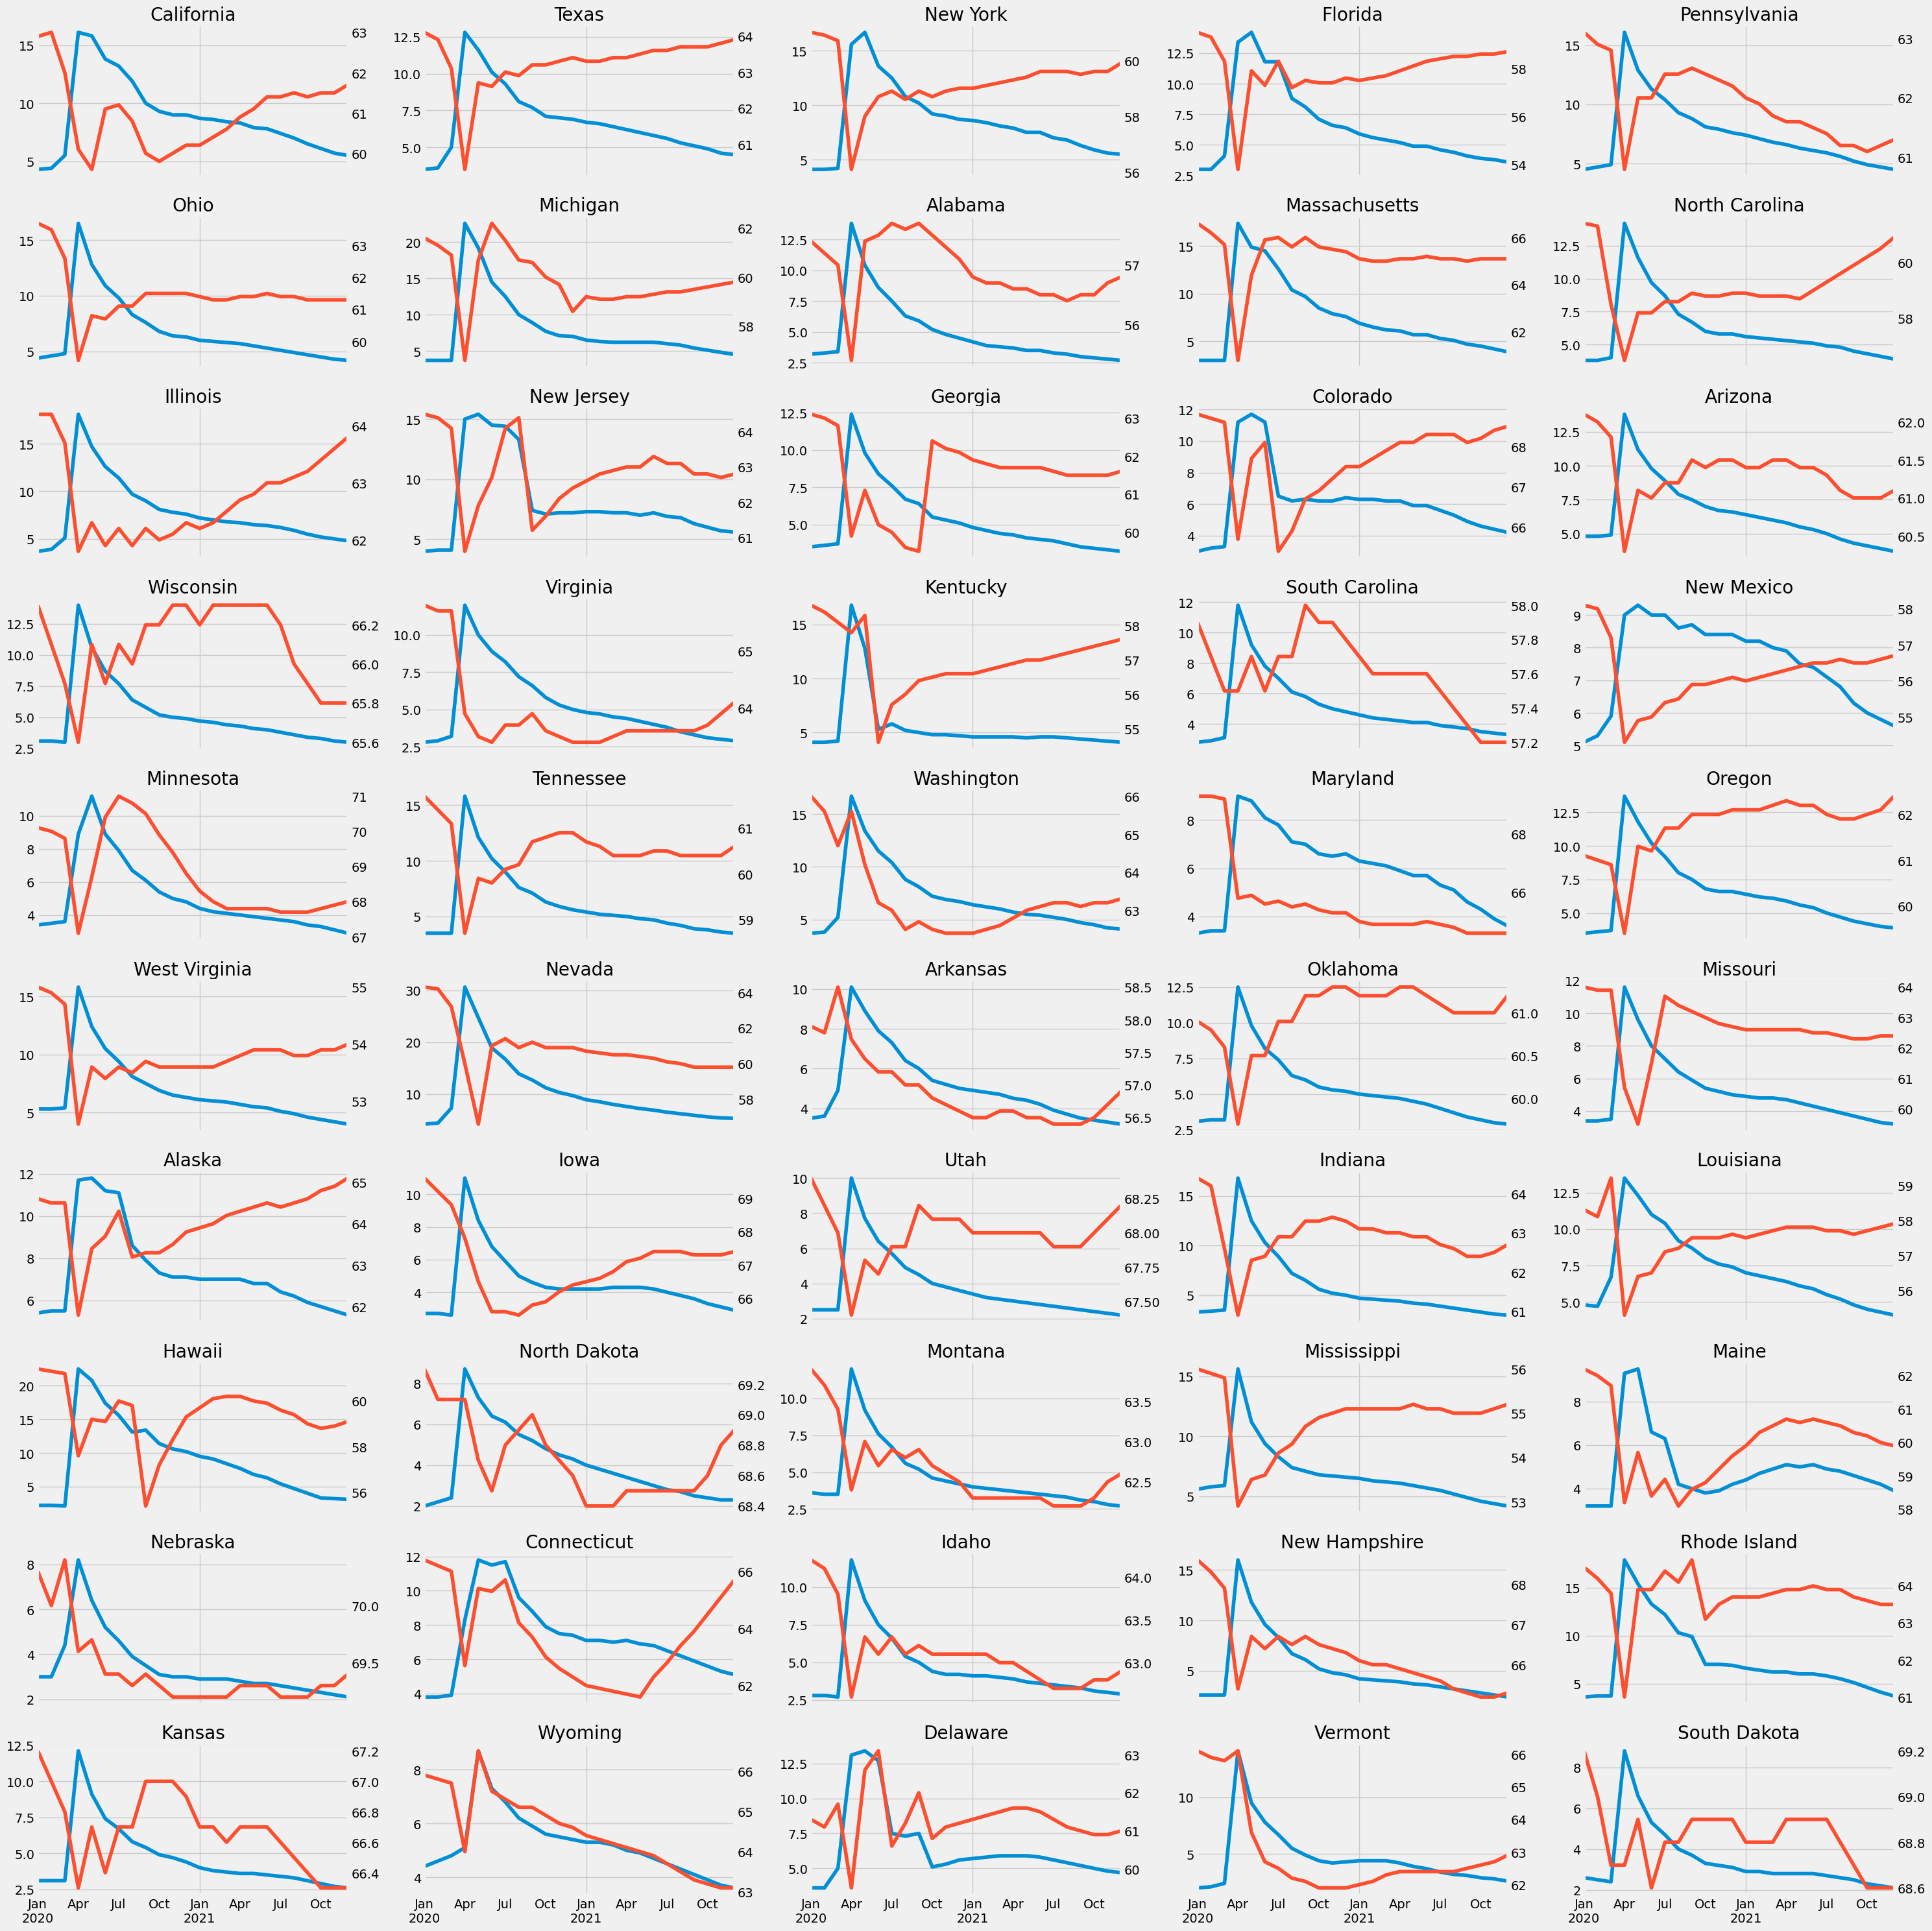

In [16]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

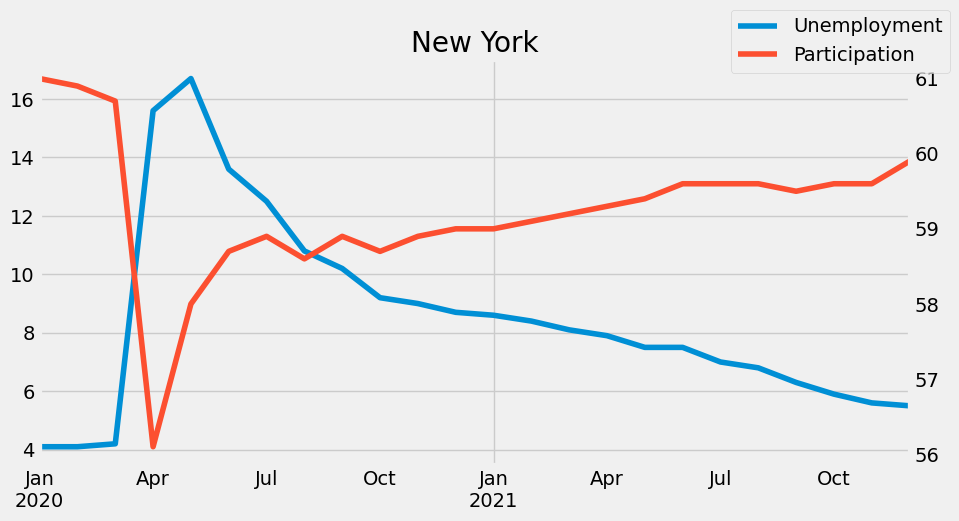

In [17]:
state = 'New York'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()